# K-Means, 샘플데이터
--- 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비
+ 샘플 만들어서 사용

In [63]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  centers=3, 
                  n_features=2,
                  cluster_std=0.5,
                  random_state=0)

In [64]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [65]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

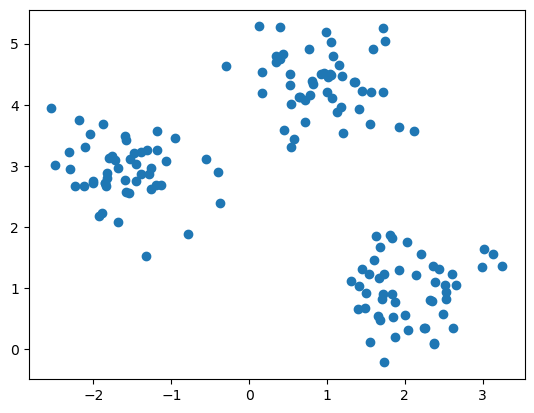

In [66]:
plt.scatter(X[:,0],X[:,1])
plt.show()

#### 학습

In [67]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=2022)
km.fit(X)


KMeans(n_clusters=3, random_state=2022)

In [68]:
y_pred = km.predict(X)
y_pred


array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0])

In [69]:
df = pd.DataFrame(X, columns=['X_1','X_2'])
df.head()

,X_1,X_2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


In [70]:
df['y_pred'] = y_pred
df.head()

,X_1,X_2,y_pred
0,2.605097,1.225296,0
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,0


In [71]:
centroid = km.cluster_centers_
centroid

array([[ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712],
       [-1.5947298 ,  2.92236966]])

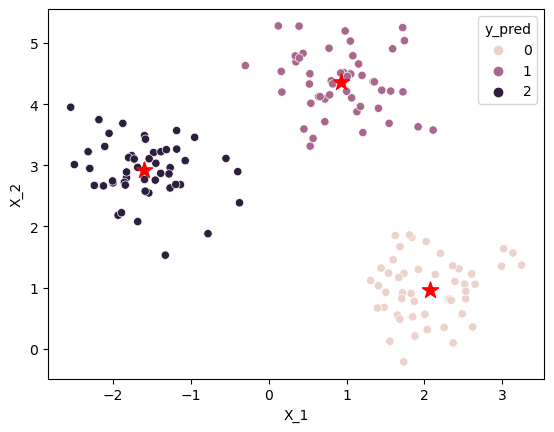

In [72]:
sns.scatterplot(data=df, x='X_1',y='X_2',hue='y_pred')
plt.scatter(centroid[:,0],centroid[:,1], 
            s=150, marker='*',c='red'
           )

### elbow method

In [73]:
inertia = []
for k in range(2, 11):
    # fit
    km = KMeans(n_clusters=k, random_state=2022)
    km.fit(X)
    
    # km.intertia_
    # append
    inertia.append(km.inertia_)
    
print(inertia)

[283.46101780209307, 72.47601670996698, 62.84061768542222, 54.29757489773776, 47.85292137212694, 39.88978825654857, 35.70304272594484, 30.624470574346063, 26.97109816223398]


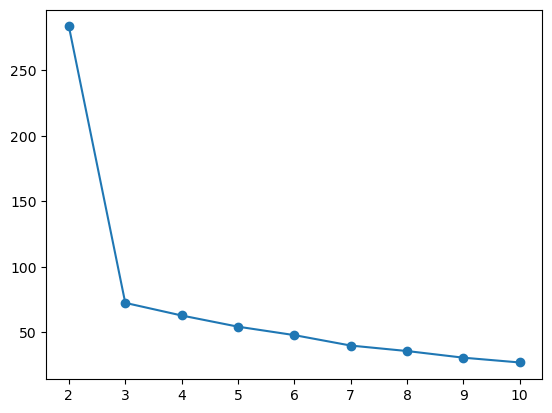

In [74]:
plt.plot(range(2,11), inertia, marker='o')
plt.show()

# iris 데이터를 사용해서 Kmeans
--

# 데이터 읽어오기

In [75]:
from sklearn import datasets

iris = datasets.load_iris()

In [82]:
iris.keys()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

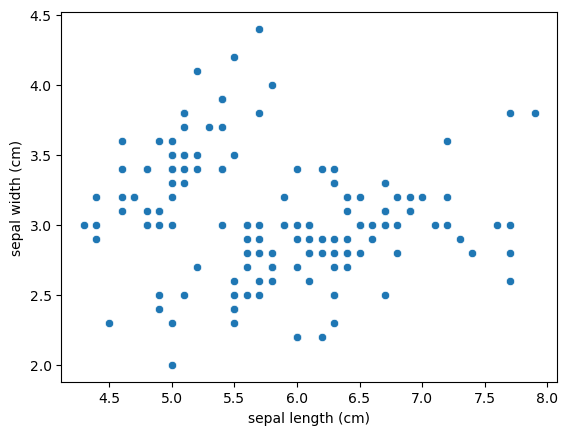

In [83]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

new_df = df.drop(['petal length (cm)','petal width (cm)'],axis=1)
new_df.head()

sns.scatterplot(data=df, x='sepal length (cm)', y = 'sepal width (cm)')

In [84]:
km = KMeans(n_clusters=3, random_state=2022)
km.fit(new_df)

KMeans(n_clusters=3, random_state=2022)

In [85]:
y_pred = km.predict(new_df)
new_df['y_pred'] = y_pred
new_df.head()

,sepal length (cm),sepal width (cm),y_pred
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [54]:
centroid = km.cluster_centers_
centroid

array([[ 6.81276596e+00,  3.07446809e+00,  2.00000000e+00],
       [ 5.00600000e+00,  3.42800000e+00,  1.00000000e+00],
       [ 5.77358491e+00,  2.69245283e+00, -6.66133815e-16]])

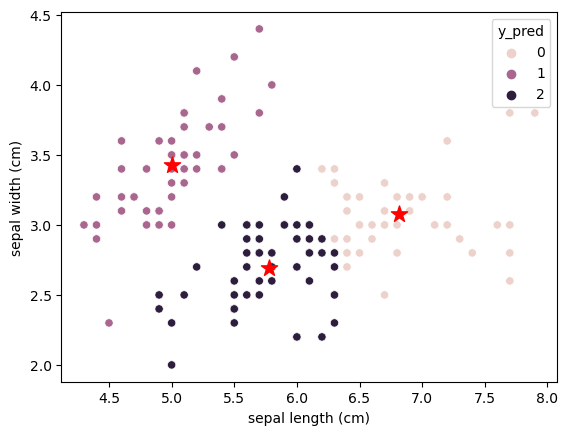

In [55]:
sns.scatterplot(data=new_df, x='sepal length (cm)',y='sepal width (cm)',hue='y_pred')
plt.scatter(centroid[:,0],centroid[:,1], 
            s=150, marker='*',c='red'
           )

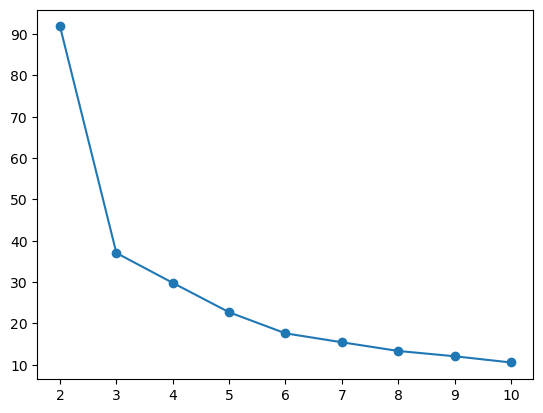

In [58]:
inertia = []
for k in range(2, 11):
    # fit
    km = KMeans(n_clusters=k, random_state=2022)
    km.fit(new_df)
    
    # km.intertia_
    # append
    inertia.append(km.inertia_)
    
plt.plot(range(2,11), inertia, marker='o')
plt.show()